In [1]:
# importing necessary libraries fro avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries for loading and inspecting the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install --upgrade scikit-learn==0.22.1

Requirement already up-to-date: scikit-learn==0.22.1 in c:\users\saimmidi\appdata\local\continuum\anaconda3\lib\site-packages (0.22.1)


In [4]:
# importing necessary libraries for model building
import sklearn
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
# loading the data
df_train = pd.read_csv(r'train.csv')

In [6]:
# reading the train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# reading test data
df_test = pd.read_csv(r'test.csv')

In [8]:
# analyzing df_test dataframe
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# creating X_train and y_train
y_train = df_train.pop('Survived')
X_train = df_train

In [10]:
# checking X_train
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# checking y_train
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
# checking for the missing values in the data
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# checking the shape of X_train
X_train.shape

(891, 11)

In [14]:
# analyzing the value counts in Pclass
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- 1 = upper class
- 2 = middle class
- 3 = lower class

In [15]:
# analyzing the value counts in Sex
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# analyzing the value counts in Sibsp
X_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
# analyzing the value counts in Parch
X_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
# analyzing value counts in embarked
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# checking the data imabalance present in the target variables
y_train.value_counts(normalize= True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Removing some of the features which are not necessary in model building

In [20]:
# analyzing X_train again
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# analyzing the columns of the dataframe 
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# dropping the unecessary columns
drop_columns = ['PassengerId','Name','Ticket','Cabin']
for i in drop_columns:
    X_train.drop(i, axis = 1, inplace = True)

In [23]:
# analyzing the dataframe after dropping some columns
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
# creating dummies for Embarked feature as it is categorical in nature
embarked_dummies = pd.get_dummies(X_train['Embarked'], drop_first= True)
# modifying the names of the columns
embarked_dummies.columns = ['Embarked_Q','Embarked_S']
# analyzing the dummies created
embarked_dummies.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
# adding them into X_train
X_train = pd.concat([X_train, embarked_dummies], axis =1)

In [26]:
# dropping the original feature from which the dummies have been created
X_train.drop('Embarked', axis =1, inplace = True)

In [27]:
# encoding the Sex variable into 0 and 1
X_train.loc[X_train['Sex'] == 'female', 'Sex'] = 0
X_train.loc[X_train['Sex'] == 'male', 'Sex'] = 1

In [28]:
# analyzing the X_train after some modifications
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [29]:
# checking missing values in X_train
X_train.isnull().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_Q      0
Embarked_S      0
dtype: int64

- There exists some missing values in age feature. Hence missing values need to be treated before providing data for modeling

#### Treating missing values in age featurem

In [30]:
# checking the statictical summary of the age column
X_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

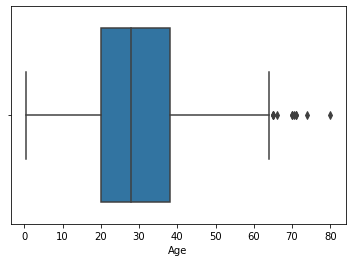

In [31]:
# checking the distribution of the values in the feature
sns.boxplot(X_train['Age'])

In [32]:
# replacing the missing values with mean of the column
X_train.loc[X_train['Age'].isnull(), 'Age'] = X_train['Age'].mean()

In [33]:
# checking for the missing values after imputation
X_train['Age'].isnull().sum()

0

In [34]:
# defining some helper functions for creating the decision tree graph
def dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file = dot_data, filled = True, rounded = True, 
                    feature_names= X_train.columns, class_names= ['Not Survived', 'Survived'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

## Model Building using Decision Trees

In [35]:
# defining the model object with hyper parameter tuning
dt_tune = DecisionTreeClassifier(random_state = 100)

In [36]:
# defining dictionary for hyper parameters combinational tuning
params = {'max_depth': [3,4,5,6,7,8,9,10],
          'min_samples_leaf': [20,30,40,50,60,70,100,150,200],
          'min_samples_split': [20,30,40,50,60,70,80,90,100,150,200,250,300]}

In [37]:
# defining the gridsearchcv object
grid_search  = GridSearchCV(dt_tune, param_grid= params,n_jobs = -1, verbose = 1, cv= 4, scoring = 'accuracy')

In [38]:
# fitting the data on top of the grid_search object
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 936 candidates, totalling 3744 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 3744 out of 3744 | elapsed:   17.4s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                

In [39]:
# checking the results of the grid search cv
grid_search.cv_results_

{'mean_fit_time': array([0.00847685, 0.00797874, 0.00947499, 0.00772977, 0.01072115,
        0.00872672, 0.01147008, 0.01321459, 0.00972384, 0.01171833,
        0.01271641, 0.01520836, 0.01670533, 0.0132153 , 0.01221758,
        0.01944745, 0.01022309, 0.00822759, 0.00847733, 0.00822747,
        0.00872689, 0.00797856, 0.0079788 , 0.00822777, 0.00772959,
        0.0079788 , 0.01146936, 0.00722998, 0.00797802, 0.00822866,
        0.0069809 , 0.00772965, 0.00698167, 0.00723076, 0.00673205,
        0.00698024, 0.00698113, 0.00698131, 0.00673181, 0.00748014,
        0.00698096, 0.0074802 , 0.00747991, 0.00822759, 0.00623351,
        0.00548506, 0.00623363, 0.00648236, 0.00723076, 0.00772905,
        0.00673229, 0.00822806, 0.00673217, 0.0097236 , 0.00623357,
        0.00747973, 0.00723076, 0.00698107, 0.00648302, 0.00997347,
        0.00872713, 0.00747973, 0.008228  , 0.00723058, 0.00748074,
        0.00698161, 0.00847733, 0.0072307 , 0.00698119, 0.00623369,
        0.00598389, 0.00598347,

In [40]:
# creating a dataframe for analyzing the results of the grid search cv
grid_result_dataframe = pd.DataFrame(grid_search.cv_results_)

In [41]:
# sorting the dataframe in order of mean_test_score
grid_result_dataframe.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
# analyzing the results after creating a dataframe
grid_result_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
19,0.008227,0.000432,0.002992,7.052013e-04,3,30,80,"{'max_depth': 3, 'min_samples_leaf': 30, 'min_...",0.798206,0.811659,0.807175,0.801802,0.804711,0.005126,1
14,0.012218,0.001781,0.005236,1.914684e-03,3,30,30,"{'max_depth': 3, 'min_samples_leaf': 30, 'min_...",0.798206,0.811659,0.807175,0.801802,0.804711,0.005126,1
20,0.008727,0.000432,0.002991,7.052854e-04,3,30,90,"{'max_depth': 3, 'min_samples_leaf': 30, 'min_...",0.798206,0.811659,0.807175,0.801802,0.804711,0.005126,1
18,0.008477,0.000864,0.002992,7.420718e-07,3,30,70,"{'max_depth': 3, 'min_samples_leaf': 30, 'min_...",0.798206,0.811659,0.807175,0.801802,0.804711,0.005126,1
17,0.008228,0.000826,0.002743,4.316395e-04,3,30,60,"{'max_depth': 3, 'min_samples_leaf': 30, 'min_...",0.798206,0.811659,0.807175,0.801802,0.804711,0.005126,1


In [42]:
# checking for the best hyper parameter combinational decision tree object
dt_grid_best = grid_search.best_estimator_
# analyzing the best combinational decision tree object
dt_grid_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

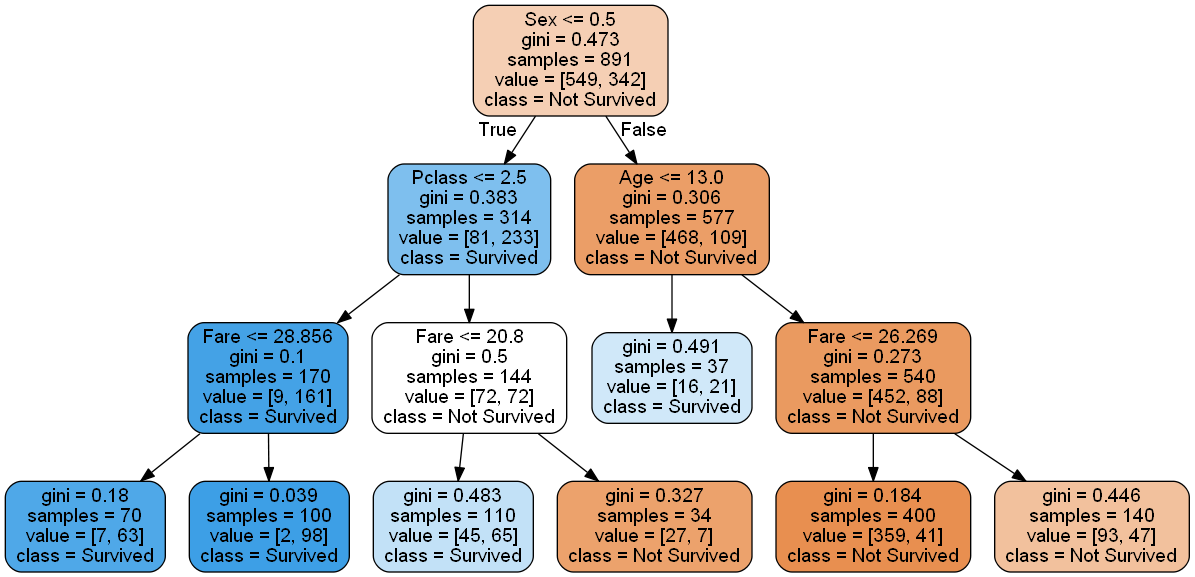

In [43]:
# plotting the decision tree
dt_grid_best_graph = dt_graph(dt_grid_best)
Image(dt_grid_best_graph.create_png())

#### Making modifications on df_test in order to make predictions as per the model

In [44]:
# analyzing df_test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
# removing some of the columns which are removed before modeling
test_columns_removed = ['PassengerId','Name','Ticket','Cabin']
for i in test_columns_removed:
    df_test.drop(i, inplace = True, axis =1)

In [46]:
# making some data modifications in sex feature
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 1

In [47]:
# making some data modifications in Embarked feature
embarked_test_dummies = pd.get_dummies(df_test['Embarked'], drop_first = True)
# renaming the columns in dummies dataframe
embarked_test_dummies.columns = ['Embarked_Q', 'Embarked_S']
# analyzing the dummies
embarked_test_dummies.head()

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [48]:
# concatenation of the dummies dataframe with original test dataframe
df_test = pd.concat([df_test, embarked_test_dummies], axis =1)

In [49]:
# dropping the original column from which dummies have been created
df_test.drop('Embarked', axis = 1, inplace = True)

In [50]:
# analyzing the dataframe after all modifications
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [51]:
# analyzing for any missing values in the remaining features of test dataframe
df_test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_Q     0
Embarked_S     0
dtype: int64

#### Treating the missing values before making predictions using the model

In [52]:
# treating missing values in Age columns
df_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

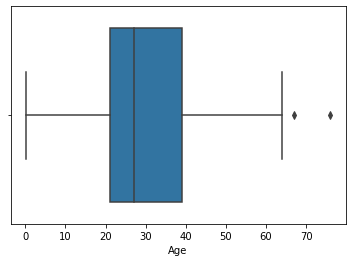

In [53]:
# checking the variable distribution using box plot
sns.boxplot(df_test['Age'])

- Very few outliers are present and also the means and median values are close to each other. Also the distribution of values across the percentiles are uniform. Hence it is better to impute the missing values with means of the column.

In [54]:
# imputing the missing values with the mean of the column
df_test.loc[df_test['Age'].isnull(), 'Age'] = df_test['Age'].mean()

In [55]:
# treating the missing values in Fare column
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

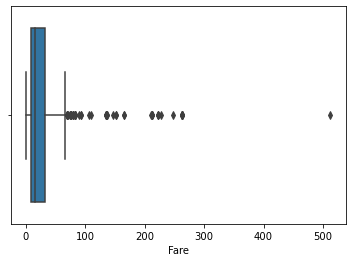

In [56]:
# analyzing the variation of values in the feature using box plot
sns.boxplot(df_test['Fare'])

- Since there are considerably outliers. It is better to impute the missing value with the median of the column. As median value will not be much affected by the outliers presence.

In [57]:
# imputing the missing value in fare column using median of the column
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].median()

In [58]:
# analyzing the missing values count after treating 
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [59]:
# creating a X_test from df_test
X_test = df_test.copy()

In [60]:
# analyzing X_test
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


#### Analyzing the performance of Decision Trees on train and making predictions on test data

##### Checking the model performance on train data

In [61]:
# making predictions on X_train using the model
y_train_pred = dt_grid_best.predict(X_train)

In [62]:
# analyzing the accuracy score
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_train

0.8148148148148148

In [63]:
# analyzing the confusion matrix of the predictions made on train set
confusion_matrix(y_train, y_train_pred)

array([[479,  70],
       [ 95, 247]], dtype=int64)

In [64]:
# making prediction on X_test
y_test_pred = dt_grid_best.predict(X_test)

In [65]:
# checking the predictions made by the model on test data
y_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Model Building using Random Forests

In [66]:
# defining the model object after obtaining best params from grid search cv
rf_best = RandomForestClassifier(random_state = 100, max_depth = 6, max_features= 3, 
                                 min_samples_split = 20, min_samples_leaf= 20, n_estimators= 500, oob_score= True)

In [67]:
# fitting the data on top of the rf_best model object
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

#### Model Evaluation of Random Forests on Train data and making predictions on Test data

In [68]:
# making predictions on the train data set
y_train_pred_random = rf_best.predict(X_train)

In [69]:
# checking the accuracy score of the model upon making predictions on train data
accuracy_score(y_train, y_train_pred_random)

0.8316498316498316

In [70]:
# checking the confusion matrix of the model on making predictions on train dataset
confusion_matrix(y_train, y_train_pred_random)

array([[518,  31],
       [119, 223]], dtype=int64)

In [71]:
# making predictions on test data set
y_test_pred_random = rf_best.predict(X_test)

In [72]:
# analyzing the test predictions
y_test_pred_random

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
# reading again the test dataframe
df_test_new = pd.read_csv(r'test.csv')
df_test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
# creating dataframe which includes Passenger Id and predictions about their survival
pred_dataframe = pd.DataFrame()
# including a columns which determines Passenger id
pred_dataframe['PassengerId'] = df_test_new['PassengerId']
# including the column which determines predictions about passengers
pred_dataframe['Survived'] = y_test_pred_random

In [75]:
# analyzing the dataframe
pred_dataframe.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [76]:
# checking the value counts in Survived
pred_dataframe['Survived'].value_counts()

0    293
1    125
Name: Survived, dtype: int64

In [77]:
# checking the shape of the dataframe
pred_dataframe.shape

(418, 2)

In [78]:
# creating a csv file of the pred_dataframe
pred_dataframe.to_csv('Titanic_Predictions.csv', index = False)

### Model Building using Random Forests with n_estimators = 1000

In [79]:
# defining the model object with tuned hyper parameters and n_estimators = 1000
rf_new = RandomForestClassifier(random_state = 100, n_jobs=-1, n_estimators= 1000,
                                max_depth = 6, max_features= 3, min_samples_split = 20,
                                min_samples_leaf= 20, oob_score= True)

In [80]:
# fitting the data on top of the model object
rf_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [81]:
# making predictions on the train data
y_train_pred_rf_new = rf_new.predict(X_train)

In [82]:
# checking the accuracy score on the predictions made on the train data
accuracy_score(y_train, y_train_pred_rf_new)

0.8294051627384961

### Model Building using KNN

In [83]:
# analyzing the train dataframe
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [84]:
# defining a copy of X_train
X_train_knn = X_train.copy()

In [85]:
# analyzing the copy of X_train
X_train_knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


#### Data Preprocessing

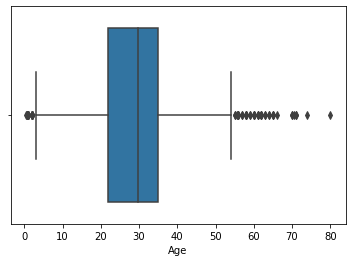

In [86]:
# checking for the outliers in Age variable
sns.boxplot(X_train_knn['Age'])

In [87]:
# checking the statistical distribution of Age variable
X_train_knn['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [88]:
# checking the percentile distribution of Age variable
X_train_knn['Age'].quantile([0.01,0.05,0.10,0.20,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

0.01     1.000000
0.05     6.000000
0.10    16.000000
0.20    20.000000
0.25    22.000000
0.50    29.699118
0.75    35.000000
0.80    38.000000
0.90    47.000000
0.95    54.000000
0.99    65.000000
Name: Age, dtype: float64

- As per the nature of the Age feature it is natural to have lower and higher age groups and as per the distribution of variable we can see that there are no much extreme outliers in the variable. The values above the whisker lines are legtimate higher and lower values.

In [89]:
# checking for the outliers in Fare feature
X_train_knn['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

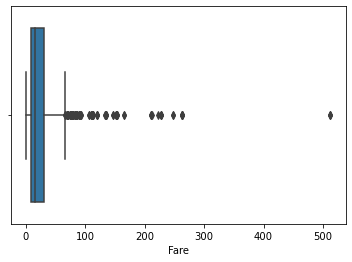

In [90]:
# checking the variation of data using boxplot
sns.boxplot(X_train_knn['Fare'])

In [91]:
# checking the quantile distribution of the feature
X_train_knn['Fare'].quantile([0.01,0.05,0.10,0.20,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

0.01      0.00000
0.05      7.22500
0.10      7.55000
0.20      7.85420
0.25      7.91040
0.50     14.45420
0.75     31.00000
0.80     39.68750
0.90     77.95830
0.95    112.07915
0.99    249.00622
Name: Fare, dtype: float64

In [92]:
# capping the extreme outliers in Fare feature using 95th percentile value
X_train_knn.loc[X_train_knn['Fare'] > X_train_knn['Fare'].quantile(0.95), 'Fare'] = X_train_knn['Fare'].quantile(0.95)

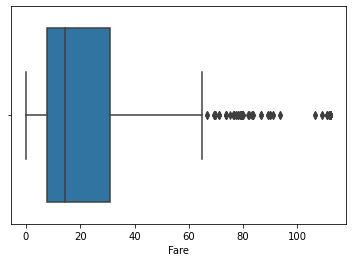

In [93]:
# checking the distribution of the feature after capping the extreme outliers
sns.boxplot(X_train_knn['Fare'])

In [94]:
# capping further extreme outliers
X_train_knn.loc[X_train_knn['Fare']> X_train_knn['Fare'].quantile(0.94), 'Fare'] = X_train_knn['Fare'].quantile(0.94)

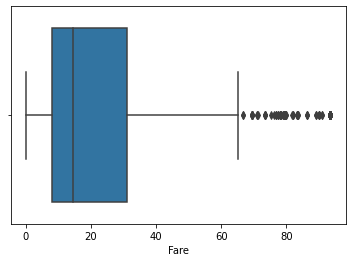

In [95]:
# checking the distribution of the feature after capping the extreme outliers
sns.boxplot(X_train_knn['Fare'])

- After capping the extreme outliers still there exists some of the outliers which are just continous incresing high values. Hence it is valid to have such higher values.

In [96]:
# analyzing the datafarme 
X_train_knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [97]:
X_train_knn.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [98]:
# feature scaling of the features
scaler = StandardScaler()
# scaling the features using scaler object
X_train_knn[['Pclass','Age','Fare']] = scaler.fit_transform(X_train_knn[['Pclass','Age','Fare']])

In [99]:
# checking the dataframe after scaling
X_train_knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.827377,1,-0.592481,1,0,-0.738075,0,1
1,-1.566107,0,0.638789,1,0,1.699270,0,0
2,0.827377,0,-0.284663,0,0,-0.712382,0,1
3,-1.566107,0,0.407926,1,0,1.007146,0,1
4,0.827377,1,0.407926,0,0,-0.707624,0,1


In [100]:
# defining the model object for KNN using default parameter
knn_classifier = KNeighborsClassifier()

In [101]:
# general condition to consider n_neighbors based on number of records
import math
math.sqrt(len(X_train_knn))

29.8496231131986

In [102]:
# defining the parameters for tuning the hyper parameters
params_knn = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
              'p': [1,2],
              'metric': ['euclidean', 'minkowski']}

In [103]:
# defining the gridsearch cv object
grid_search_knn = GridSearchCV(knn_classifier, verbose = 1, 
                               scoring = 'accuracy', param_grid= params_knn)

In [104]:
# fitting the data on top of gridsearch cv object
grid_search_knn_fit = grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.1s finished


In [105]:
# checking the results of the gridsearch cv
grid_search_knn_fit.cv_results_

{'mean_fit_time': array([0.00518575, 0.00418863, 0.00458722, 0.00438809, 0.00419397,
        0.00418754, 0.00459299, 0.00458779, 0.00438871, 0.00398912,
        0.00418882, 0.00398927, 0.00438881, 0.00498619, 0.00419273,
        0.00479341, 0.00398836, 0.00458779, 0.00438614, 0.0035954 ,
        0.00358381, 0.00339293, 0.00317235, 0.00339093, 0.00338402,
        0.00339088, 0.00299201, 0.00299211, 0.00299206, 0.00299201,
        0.00299215, 0.00319204, 0.00319171, 0.00319896, 0.00300822,
        0.00298452, 0.00299196, 0.0029829 , 0.00299306, 0.00297813,
        0.00299811, 0.00300603, 0.00299401, 0.00320454, 0.00299082,
        0.00298648, 0.00339069, 0.00299225, 0.00299301, 0.00318575,
        0.00379024, 0.00299187, 0.00299244, 0.00299168, 0.00299215,
        0.00419006]),
 'std_fit_time': array([1.46621980e-03, 3.99184437e-04, 4.88071760e-04, 4.89006189e-04,
        4.10223076e-04, 3.99735220e-04, 7.94377655e-04, 7.97462506e-04,
        4.88792758e-04, 6.32034650e-04, 9.77077635e-0

In [106]:
# checking better in dataframe
grid_result_knn_dataframe = pd.DataFrame(grid_search_knn_fit.cv_results_)
# sorting the results based in mean test score
grid_result_knn_dataframe.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
# checking the dataframe
grid_result_knn_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.002994,7.079707e-06,0.006780,0.000748,minkowski,17,1,"{'metric': 'minkowski', 'n_neighbors': 17, 'p'...",0.653631,0.702247,0.735955,0.797753,0.735955,0.725108,0.047210,1
28,0.002992,6.843901e-07,0.006183,0.000399,minkowski,3,1,"{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}",0.698324,0.724719,0.741573,0.752809,0.707865,0.725058,0.020265,2
30,0.002992,3.989506e-07,0.005784,0.000399,minkowski,5,1,"{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}",0.664804,0.724719,0.730337,0.780899,0.719101,0.723972,0.036895,3
40,0.002998,1.769766e-05,0.006377,0.000496,minkowski,15,1,"{'metric': 'minkowski', 'n_neighbors': 15, 'p'...",0.659218,0.713483,0.735955,0.764045,0.735955,0.721731,0.035131,4
36,0.002992,3.263462e-06,0.006389,0.000480,minkowski,11,1,"{'metric': 'minkowski', 'n_neighbors': 11, 'p'...",0.648045,0.713483,0.724719,0.769663,0.747191,0.720620,0.041100,5


In [107]:
# checking the best estimator of grid search
grid_best_knn = grid_search_knn_fit.best_estimator_
grid_best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')

In [108]:
# making predictions on the train data
y_train_pred_knn = grid_best_knn.predict(X_train_knn)

In [109]:
# checking the accuracy score upon makiing prediction on train set
accuracy_score(y_train, y_train_pred_knn)

0.3838383838383838

### Model Building using Logistic Regression

In [110]:
# importing necessary library
from sklearn.linear_model import LogisticRegression

In [111]:
# making a copy of X_train_knn
X_train_log = X_train_knn.copy()

In [112]:
# checking X_train_log
X_train_log.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.827377,1,-0.592481,1,0,-0.738075,0,1
1,-1.566107,0,0.638789,1,0,1.699270,0,0
2,0.827377,0,-0.284663,0,0,-0.712382,0,1
3,-1.566107,0,0.407926,1,0,1.007146,0,1
4,0.827377,1,0.407926,0,0,-0.707624,0,1


In [113]:
# defining model object
log_reg = LogisticRegression()

In [114]:
# fitting the data on top of the model object
log_reg.fit(X_train_log, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
# making prediction on train set using the model
y_train_pred_log = log_reg.predict(X_train_log)

In [116]:
# checking the accuracy score on train data upon making predictions
accuracy_score(y_train, y_train_pred_log)

0.7968574635241302

### Model Building using Stacking Ensemble

In [117]:
from sklearn.ensemble import StackingClassifier

##### Model building using stacking ensemble with level 2 as Decision Tree with hyper parameter tuning

In [118]:
# defining estimators for the level 1 model class
level1_estimators = [('lr', LogisticRegression()),
                     ('dt_best', DecisionTreeClassifier(random_state = 100, max_depth = 3, min_samples_leaf = 30, min_samples_split = 20 ))]

In [119]:
# defining the stacking ensemble model object
stack_classifier = StackingClassifier(estimators= level1_estimators, cv = 4, n_jobs = -1, verbose =1,
                                      final_estimator= DecisionTreeClassifier(random_state = 100, max_depth = 3, min_samples_leaf = 30, min_samples_split = 20))

In [120]:
# checking X_train again
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [121]:
# fitting the data on top of the stack ensemble model
stack_classifier.fit(X_train, y_train)

StackingClassifier(cv=4,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('dt_best',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                              

In [122]:
# checking the final estimator
stack_final = stack_classifier.final_estimator_
stack_final

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [123]:
# making predictions based on the final estimator of stacking ensemble
y_train_pred_stack = stack_classifier.predict(X_train)

In [124]:
# checking the performance of the model in terms of accuracy on train dataset
accuracy_score(y_train, y_train_pred_stack)

0.8148148148148148

- The accuracy what we have got is similiar to that of the single Decision tree. Hence stacking ensemble is not much performing better than single decision tree.

#### Model Building using stacking considering Logistic Regression at level 2

In [125]:
# defining the estimators for level 1 model classl
level1_estimators_new = [('rf', RandomForestClassifier(random_state = 100, max_depth = 6, max_features= 3, 
                                 min_samples_split = 20, min_samples_leaf= 20, n_estimators= 1000 )),
                       ('lr', LogisticRegression()),
                       ('dt', DecisionTreeClassifier(random_state = 100, max_depth = 3, min_samples_leaf = 30, min_samples_split = 20 )),
                        ('knn', KNeighborsClassifier(p = 1, metric= 'minkowski', n_neighbors= 17))]

In [126]:
# defining the stacking model object
stack_classifier_new = StackingClassifier(estimators= level1_estimators_new, n_jobs = -1, verbose = 1, cv = 4,
                                          final_estimator= LogisticRegression())

In [127]:
# fitting the data on top of the stack model object
stack_classifier_new.fit(X_train, y_train)

StackingClassifier(cv=4,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features=3,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=20,
                                                       min_samples_split=20,
                                              

In [128]:
# making predictions on the train dataset
y_train_pred_stack_new = stack_classifier_new.predict(X_train)

In [129]:
# checking the model performance on the train data
accuracy_score(y_train, y_train_pred_stack_new)

0.8237934904601572

In [130]:
# checking the final estimaor coefficients
stack_classifier_new.final_estimator_.coef_

array([[2.19138097, 1.19482822, 1.96253933, 0.65892806]])

In [131]:
# building the list for the model names
stack_models_names_list = []
for i in level1_estimators_new:
    stack_models_names_list.append(i[0])
# creating the single dimension array of the list
stack_model_names_array = np.array(stack_models_names_list)
# checking the array after creation from list
stack_model_names_array

array(['rf', 'lr', 'dt', 'knn'], dtype='<U3')

In [132]:
# Creating a dataframe for checking the model importances
model_imp_dataframe = pd.DataFrame()
# including column for the names of the models
model_imp_dataframe['Models'] = stack_model_names_array
# inlcuding the model importances values
model_imp_dataframe['imp_value'] = stack_classifier_new.final_estimator_.coef_[0]
# checking the dataframe
model_imp_dataframe

,Models,imp_value
0,rf,2.191381
1,lr,1.194828
2,dt,1.962539
3,knn,0.658928
